# Logistic regression Test
: 각 이미지는 28x28/ gray/ 10 class

In [ ]:
""" Label
0: 티셔츠
1: 바지
2: 스웨터
3: 드레스
4: 코트
5: 샌들
6: 셔츠
7: 운동화
8: 가방
9: 앵클 부츠

"""

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

## Download dataset and create DataLoader

In [2]:
# download dataset / dataloader 생성
train_dataset = dataset.FashionMNIST(root = './data', train=True,
                                     transform=transforms.ToTensor(),
                                     download=True)
test_dataset = dataset.FashionMNIST(root = './data', train=True,
                                     transform=transforms.ToTensor(),
                                     download=True)

# create train/test Loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = 100,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = 1,
                                          shuffle = True)

100.0%


Extracting ./data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



100.6%


Extracting ./data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



100.0%


Extracting ./data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ./data\FashionMNIST\raw



119.3%

Extracting ./data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\FashionMNIST\raw



## Define Model

In [11]:
class LosigiticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LosigiticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        out = self.linear(x)
        #sigmoid X : 이진분류가 아니라 다중분류이기 때문이다.
        return out

## Set hyperparameter

In [12]:
input_size = 28 *28     #이미지 크기가 28*28/ 흑백 아니라면 28*28*3
num_classes = 10        #label이 10개
num_epochs = 10
lr = 0.001

total_step = len(train_loader)
print(total_step)


600


## Model, Loss, Optimzer

In [13]:
model = LosigiticRegression(input_size=input_size,
                            num_classes=num_classes)
print(model)

LosigiticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

#device setting
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('using device >>', device)

model.to(device)

using device >> cpu


LosigiticRegression(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

## Train loop

In [15]:
loss_list = []
acc_list = []

for epoch in range(num_epochs):
    correct = 0
    total = 0

    for i, (images, labels) in enumerate(train_loader):
        #load data to device (dataloader했기 때문에)
        images = images.reshape(-1, input_size).to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        #forward, loss 계산
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward, 가중치 업데이트
        loss.backward()
        optimizer.step()

        #로그 출력, acc 
        if (i+1)%1 ==0:
            loss_list.append(loss.item())
            _, preodicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (preodicted == labels).sum().item()
            acc_list.append(correct/total)
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}, Train Acc:{acc_list[-1]:.4f}")


Epoch [1/10], Step [1/600], Loss: 2.3927, Train Acc:0.1300
Epoch [1/10], Step [2/600], Loss: 2.3523, Train Acc:0.1300
Epoch [1/10], Step [3/600], Loss: 2.3563, Train Acc:0.1367
Epoch [1/10], Step [4/600], Loss: 2.3610, Train Acc:0.1300
Epoch [1/10], Step [5/600], Loss: 2.3271, Train Acc:0.1300
Epoch [1/10], Step [6/600], Loss: 2.3504, Train Acc:0.1383
Epoch [1/10], Step [7/600], Loss: 2.3135, Train Acc:0.1486
Epoch [1/10], Step [8/600], Loss: 2.3142, Train Acc:0.1487
Epoch [1/10], Step [9/600], Loss: 2.2781, Train Acc:0.1533
Epoch [1/10], Step [10/600], Loss: 2.2783, Train Acc:0.1580
Epoch [1/10], Step [11/600], Loss: 2.2940, Train Acc:0.1591
Epoch [1/10], Step [12/600], Loss: 2.2104, Train Acc:0.1650
Epoch [1/10], Step [13/600], Loss: 2.2258, Train Acc:0.1685
Epoch [1/10], Step [14/600], Loss: 2.2025, Train Acc:0.1736
Epoch [1/10], Step [15/600], Loss: 2.1535, Train Acc:0.1780
Epoch [1/10], Step [16/600], Loss: 2.1640, Train Acc:0.1819
Epoch [1/10], Step [17/600], Loss: 2.1327, Train 

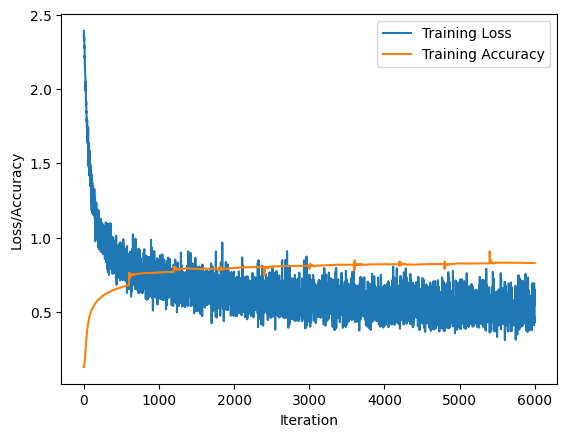

In [17]:
# loss, acc visualize
plt.plot(loss_list, label='Training Loss')
plt.plot(acc_list, label='Training Accuracy')
plt.xlabel('Iteration')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()